In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Frame Extraction Cell ---

video_path = 'DynamicHard24.mp4'
frame_indices = [n * 43 for n in range(12)]

extracted_frames = []

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file {video_path}")
else:
    for index in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, index)
        ret, frame = cap.read()
        if ret:
            extracted_frames.append(frame)
        else:
            print(f"Warning: Could not read frame at index {index}")
    cap.release()

print(f"Extracted {len(extracted_frames)} frames.")

# Global variables to store intermediate results for subsequent cells
processed_edges = []
processed_dilated_inverted = []
processed_contours = []

# Define colors (from your original code)
red = (86, 45, 143)
white = (212, 213, 211)
green = (64, 90, 58)
blue = (56, 22, 1)

Extracted 12 frames.


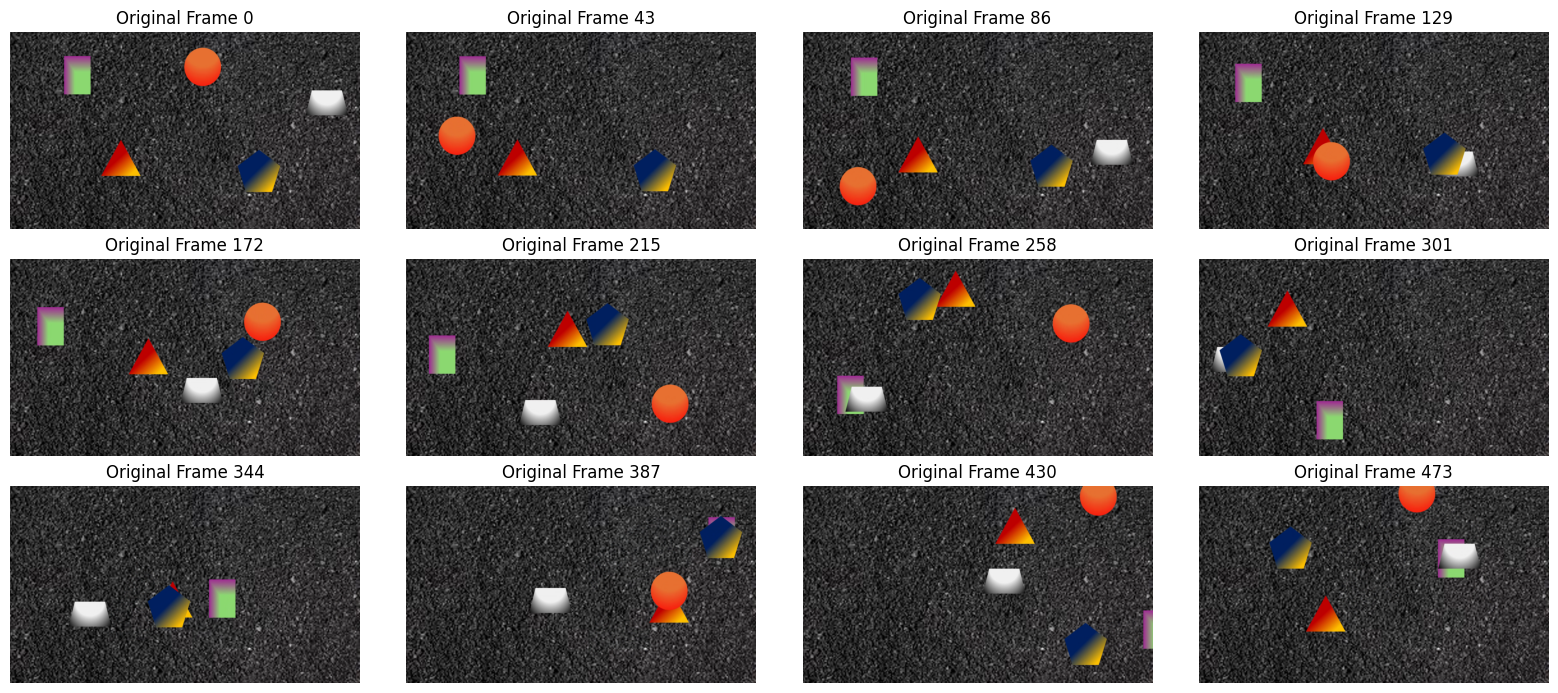

In [4]:
fig, axes = plt.subplots(3, 4, figsize=(16, 7))
axes = axes.flatten()

if len(extracted_frames) == 0:
    print("No frames were extracted to display.")
else:
    for i, frame_bgr in enumerate(extracted_frames):
        if i < len(axes):
            rgb_frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
            axes[i].imshow(rgb_frame)
            axes[i].set_title(f"Original Frame {frame_indices[i]}")
            axes[i].axis('off')

    for j in range(len(extracted_frames), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

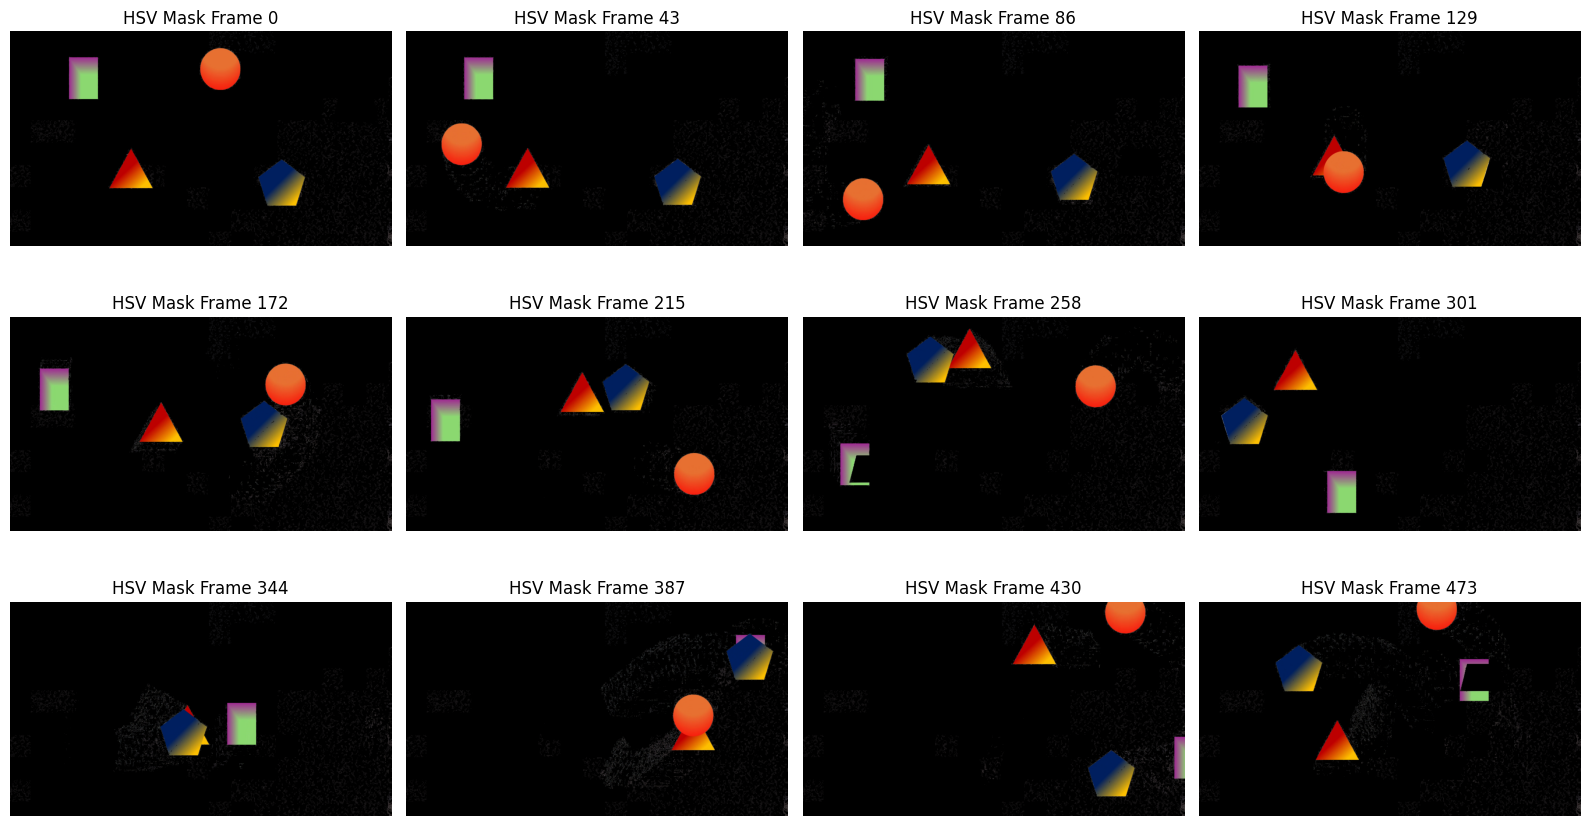

In [21]:
# Define HSV color range (modify as needed)
lower_hsv = np.array([0, 20, 20])
upper_hsv = np.array([255, 255, 255])

fig, axes = plt.subplots(3, 4, figsize=(16, 9))
axes = axes.flatten()

hsv_binaries = []  # Store binary masks for later use

for i, frame_bgr in enumerate(extracted_frames):
    frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    frame_hsv = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2HSV)

    hsv_mask = cv2.inRange(frame_hsv, lower_hsv, upper_hsv)
    hsv_masked = cv2.bitwise_and(frame_rgb, frame_rgb, mask=hsv_mask)
    hsv_binary = cv2.threshold(hsv_mask, 1, 255, cv2.THRESH_BINARY)[1]

    hsv_binaries.append(hsv_binary)  # Save binary mask

    axes[i].imshow(hsv_masked)
    axes[i].set_title(f"HSV Mask Frame {frame_indices[i]}")
    axes[i].axis('off')

for j in range(len(extracted_frames), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

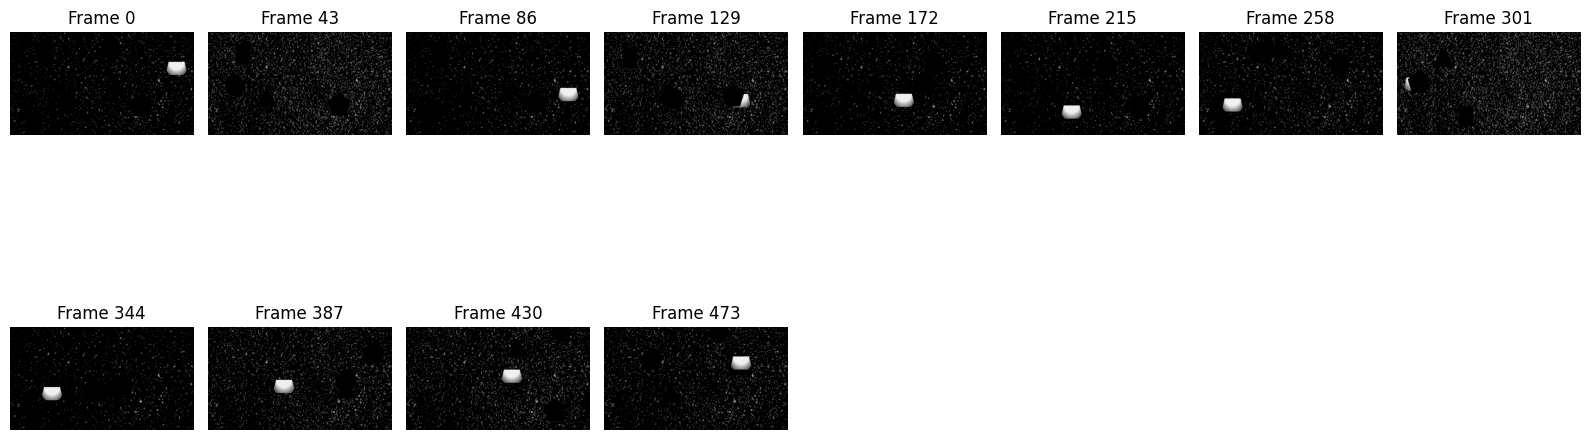

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Your HSV range - adjust as needed
lower_hsv = np.array([0, 0, 0])
upper_hsv = np.array([255, 10, 255])

fig, axes = plt.subplots(3, 8, figsize=(16, 9))
axes = axes.flatten()

combined_masks = []

for i, frame_bgr in enumerate(extracted_frames):
    frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    frame_hsv = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2HSV)
    
    # 1) HSV mask
    hsv_mask = cv2.inRange(frame_hsv, lower_hsv, upper_hsv)
    
    # 2) Grayscale + Gaussian blur
    gray = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    
    # 3) Otsu's threshold
    _, otsu_mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # 4) Combine masks (AND operation)
    combined_mask = cv2.bitwise_and(hsv_mask, otsu_mask)
    combined_masks.append(combined_mask)
    
    # 5) Apply combined mask to RGB image for visualization
    masked_rgb = cv2.bitwise_and(frame_rgb, frame_rgb, mask=combined_mask)
    
    axes[i].imshow(masked_rgb)
    axes[i].set_title(f"Frame {frame_indices[i]}")
    axes[i].axis('off')

# Remove unused subplots if any
for j in range(len(extracted_frames), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


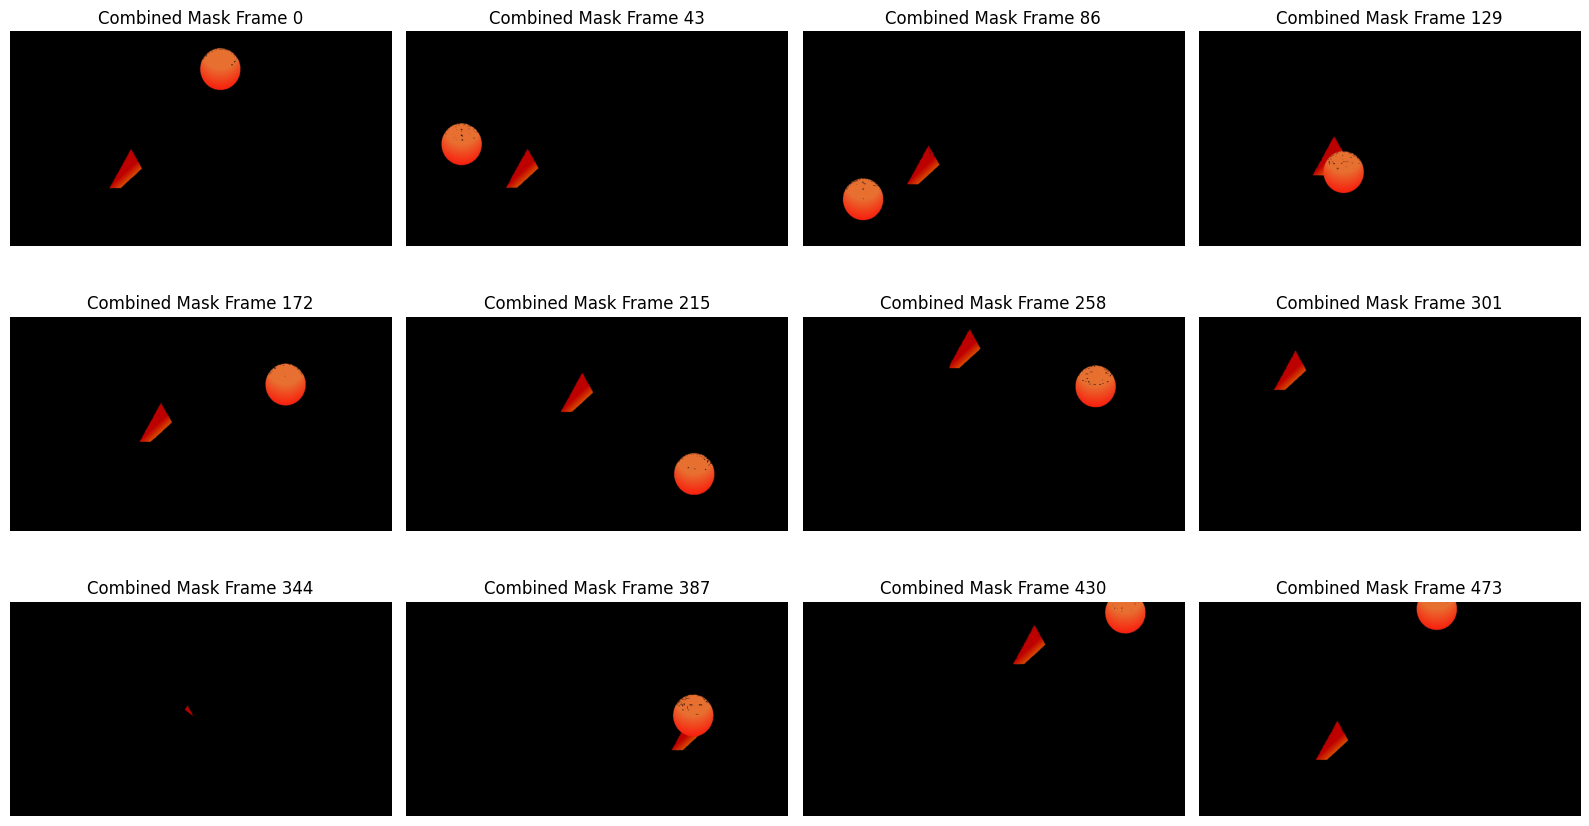

In [17]:
fig, axes = plt.subplots(3, 4, figsize=(16, 9))
axes = axes.flatten()

for i in range(len(extracted_frames)):
    frame_rgb = cv2.cvtColor(extracted_frames[i], cv2.COLOR_BGR2RGB)

    # Union of binary masks from previous cells
    union_mask = cv2.bitwise_or(hsv_binaries[i], rgb_binaries[i])

    union_masked_rgb = cv2.bitwise_and(frame_rgb, frame_rgb, mask=union_mask)

    axes[i].imshow(union_masked_rgb)
    axes[i].set_title(f"Combined Mask Frame {frame_indices[i]}")
    axes[i].axis('off')

for j in range(len(extracted_frames), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
